## Python Basic

In [2]:
a = 3
b = 2
a + b

5

## Linear Regression

In [5]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/holintech/master/data/salary.csv', index_col = 0)

In [7]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [12]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values

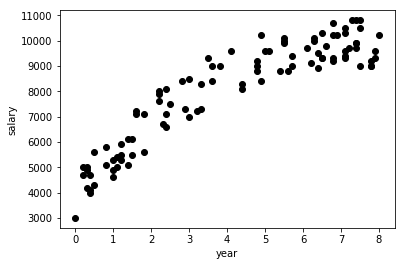

In [15]:
plt.scatter(X, Y,  color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
?LinearRegression

In [17]:
regr = LinearRegression()

In [18]:
regr.fit(X,Y)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
import numpy as np
regr.predict(np.array([[0],[2],[4]]))

array([5049.00989981, 6474.1981721 , 7899.3864444 ])

In [22]:
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)


Coefficients: [712.59413615]
Intercept: 5049.009899813836


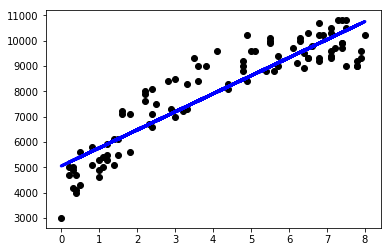

In [23]:
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

## Polynomial Regression

In [31]:
weight  = 70
# array list
weights = [60,70,80, '90公斤']

import numpy as np
# array
np.array([60,70,80])
weights = np.array([60,70,80, '90公斤'])
weights

array(['60', '70', '80', '90公斤'], dtype='<U21')

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_       = poly_reg.fit_transform(X)


In [33]:
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)

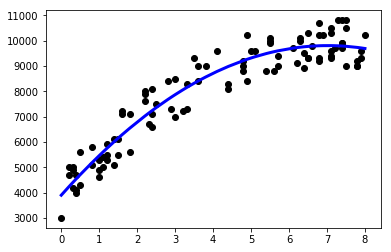

In [36]:
plt.scatter(X, Y,  color='black')
plt.plot(X2, regr.predict(X2_), linewidth = 3, color="blue")
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

poly_reg = PolynomialFeatures(degree=3)
X_       = poly_reg.fit_transform(X)


In [38]:
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
X3 = X.sort_values(['year'])
X3_ = poly_reg.fit_transform(X3)

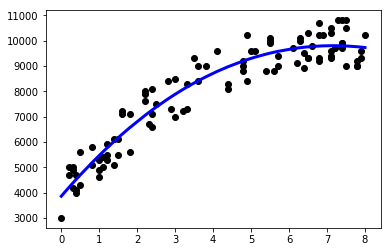

In [40]:
plt.scatter(X, Y,  color='black')
plt.plot(X3, regr.predict(X3_), linewidth = 3, color="blue")
plt.show()